# 주택 데이터로 회귀분석

1978년 보스턴 교외 지역의 주택 정보를 담고 있다. 


속성:

1. CRIM: 도시의 인당 범죄율
2. ZN: 25,000 평방 피트가 넘는 주택 비율
3. INDUS: 도시에서 소매 업종이 아닌 지역 비율
4. CHAS: 찰스강 인접 여부(강 주변=1, 그 외=0)
5. NOX: 일산화질소 농도(10ppm 당)
6. RM: 주택의 평균 방 개수
7. AGE: 1940년 이전에 지어진 자가 주택 비율
8. DIS: 다섯 개의 보스턴 고용 센터까지 가중치가 적용된 거리
9. RAD: 방사형으로 뻗은 고속도로까지 접근성 지수
10. TAX: 10,000달러당 재산세율
11. PTRATIO: 도시의 학생-교사 비율
12. B: 1000(Bk - 0.63)^2, 여기에서 Bk는 도시의 아프리카계 미국인 비율
13. LSTAT: 저소득 계층의 비율
14. MEDV: 자가 주택의 중간 가격(1,000달러 단위)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../data/housing.data.txt')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 산점도 행렬

산점도 행렬은 데이터 셋에 있는 특성간의 관계를 시작적으로 잘 요약한다.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

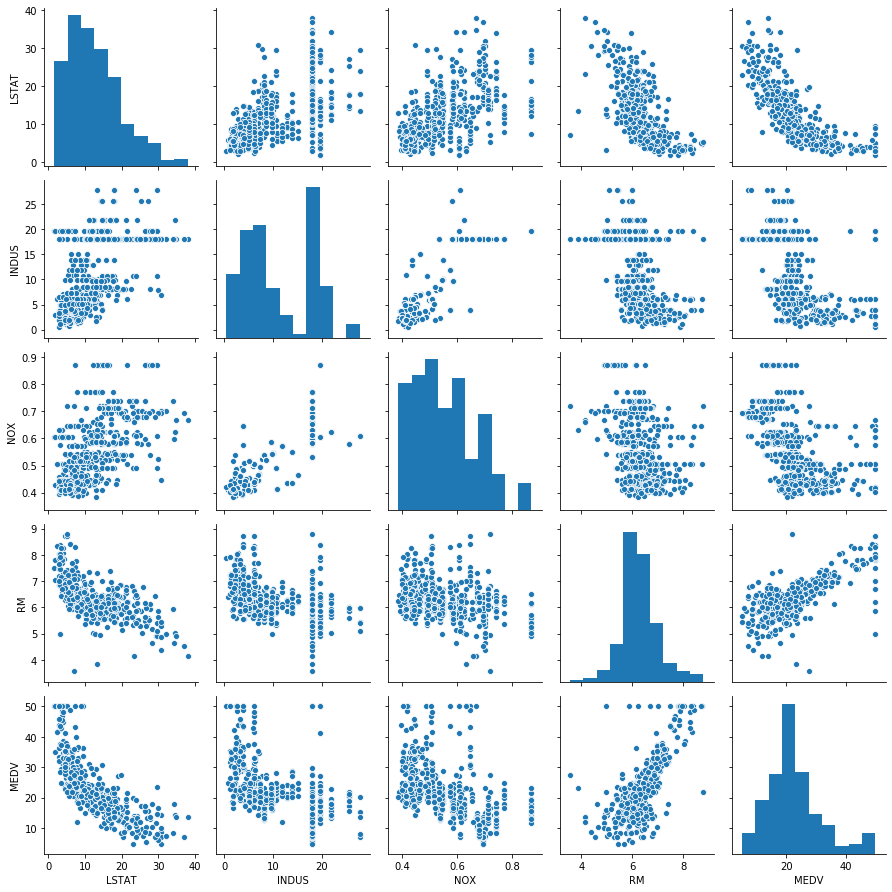

In [4]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

### 사이킷런으로 회귀 모델의 가중치 추정하기

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X = df[['RM']].values
y = df['MEDV'].values

In [7]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print('기울기: %.3f' % model.coef_[0])
print('절편: %.3f' % model.intercept_)

기울기: 9.102
절편: -34.671


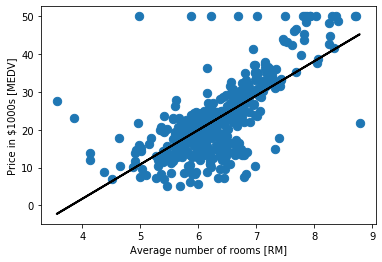

In [8]:
plt.scatter(X, y, s=70)
plt.plot(X, model.predict(X), color='black', lw=2)

plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

plt.show()

### 선형회귀 모형의 성능 평가

In [9]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print("회귀계수:\n",slr.coef_)
print("\n")
print("훈련 데이터 R^2 :", slr.score(X_train, y_train))
print("테스트 데이터 R^2 :",slr.score(X_test, y_test))

회귀계수:
 [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]


훈련 데이터 R^2 : 0.7645451026942549
테스트 데이터 R^2 : 0.6733825506400177


## 회귀에 규제 적용하기

일반적인 회귀방법에서 비용함수는 MSE를 최소화하는 방향으로 나아가게 된다. 일반적인 회귀방법에서 데이터의 특징수가 많아질수록(차원이 증가할수록) overfitting에 대한 위험성이 커지게 된다. 

* Ridge 회귀 : 릿지 회귀는 L2-Norm을 사용한 회귀이다. 이 회귀방법은 일반적으로 영향을 거의 미치지 않는 특성에 대하여 0에 가까운 가중치를 주게 된다. 
* Lasso 회귀 : 라쏘 회귀는 L1-Norm을 사용한 회귀입니다. 특성값의 계수가 매우 낮다면 0으로 수렴하게 하여 특성을 지워버립니다. 특성이 모델에 미치는 영향을 0으로 만든다.

### Ridge 회귀
alpha값을 높이면 계수를 0에 더 가깝게 만들어 훈련데이터에 대한 성능은 다소 낮아 지지만 일반화에는 도움이 될 수 있다. 

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print(ridge.coef_)

[-1.18308575e-01  4.61259764e-02 -2.08626416e-02  2.45868617e+00
 -8.25958494e+00  3.89748516e+00 -1.79140171e-02 -1.39737175e+00
  2.18432298e-01 -1.16338128e-02 -9.31711410e-01  7.26996266e-03
 -4.94046539e-01]


In [12]:
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (ridge.score(X_train, y_train),
                                       ridge.score(X_test, y_test)))

훈련 R^2: 0.762, 테스트 R^2: 0.667


###  Lasso 회귀
특정 계수가 0이 될 수 있다. 계수가 0이 되면 모형에서 완전히 제외되는 특성이 생긴다. 이것을 통해 feature selection을 수행하는 것이다.   

alpha 계수를 크게 할 수록 규제가 커져서 완전이 0이 되는 계수가 더 늘어나게 된다.

In [13]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.06586193  0.04832933 -0.          0.         -0.          0.86898466
  0.01217999 -0.75109378  0.2000743  -0.01395062 -0.84602363  0.00668818
 -0.73266568]


In [14]:
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (lasso.score(X_train, y_train),
                                       lasso.score(X_test, y_test)))

훈련 R^2: 0.708, 테스트 R^2: 0.612
